<a href="https://colab.research.google.com/github/vfrantc/data_viz/blob/master/assigment_1_Frants_Vladimir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1. Frants Vladimir

Use Vincent van Gogh paintings dataset
Create 2 visualizations (described below) using any software
If your outputs are still images - use the Add Image function in Milanote and place these 2 images inside your home assignment 1 board
if you made interactive visualizations and published them in the web, then to the following to share it with the instructor 

* take a screenshot, add as an image (same as normal image); 
* use Add Caption function and place the link to the web visualization into the caption.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset

In [56]:
!wget https://raw.githubusercontent.com/vfrantc/data_viz/master/data/van_gogh_genre.csv

--2020-09-25 02:58:19--  https://raw.githubusercontent.com/vfrantc/data_viz/master/data/van_gogh_genre.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119287 (116K) [text/plain]
Saving to: ‘van_gogh_genre.csv.2’

van_gogh_genre.csv. 100%[===================>] 116.49K  --.-KB/s    in 0.01s   

2020-09-25 02:58:19 (9.81 MB/s) - ‘van_gogh_genre.csv.2’ saved [119287/119287]



In [57]:
df = pd.read_csv('van_gogh_genre.csv')

In [58]:
df.head()

,Filename,image_num,image_proportion,brightness_median,brightness_stdev,saturation_median,saturation_stdev,hue_median,hue_stdev,Genre.UPDATED,Genre,Genre_gen,Year_Month,Label_Place,Unnamed: 14,Year,Month,Season,Title
0,001.jpg,1,0.6027,68,38.1091,80,30.8723,31,11.6209,still-life,still-life,still-life,1881.8340,1_Early,1881.916667,1881.0,11,fall,Valley with Ploughman Seen from Above
1,002.jpg,2,0.9100,23,60.8221,170,65.5958,8,86.5111,still-life,still-life,still-life,1881.8340,1_Early,1881.916667,1881.0,11,fall,Wooden Sheds
2,003.jpg,3,0.6800,61,78.5414,173,60.2914,12,55.2197,still-life,still-life,still-life,1881.8340,1_Early,1881.916667,1881.0,11,fall,First Steps (after Millet)
3,004.jpg,4,0.6825,210,62.8654,92,75.0203,44,62.3412,landscape,landscape,landscape,1882.5838,1_Early,1882.666667,1882.0,8,summer,Still Life: Vase with Oleanders and Books
4,005.jpg,5,1.3710,84,60.8210,57,29.2818,51,63.9256,cityscape,cityscape,cityscape,1882.5838,1_Early,1882.666667,1882.0,8,summer,Still Life: Vase with Twelve Sunflowers


# Some data wrangling

In [59]:
df.Genre.unique()

array(['still-life', 'landscape', 'cityscape', 'Figural composition',
       'seascape', 'genre scene', 'rural town or village', 'animals',
       'portrait', 'nude', 'figure studies', 'self-portrait',
       'Japanese copies', 'religious'], dtype=object)

In [60]:
df.Season.unique()

array(['fall', 'summer', 'spring', 'winter'], dtype=object)

In [61]:
df.Label_Place.unique()

array(['1_Early', '2_Paris', '3_Arles', '4_Saint-Remy-de-Provence_asylum',
       '5_Auvers-sur-Oise'], dtype=object)

In [62]:
df = df.replace({'Label_Place': {'1_Early' : 'Early', 
                            '2_Paris' : 'Paris', 
                            '3_Arles' : 'Arles', 
                            '4_Saint-Remy-de-Provence_asylum' : 'Saint Remy',
                            '5_Auvers-sur-Oise' : 'Auvers'},
            'Season': {'winter': 'Winter',
                       'spring': 'Spring',
                       'summer': 'Summer',
                       'fall': 'Fall'}})

# Visualization 1

Explore the relations between `genres`, `seasons`, and `places` where the artist worked. Are there any patterns present?  (you can if you like manipulate these categories, creating larger ones, or breaking them in different ways). If it does not work out to use all 3, use 2.

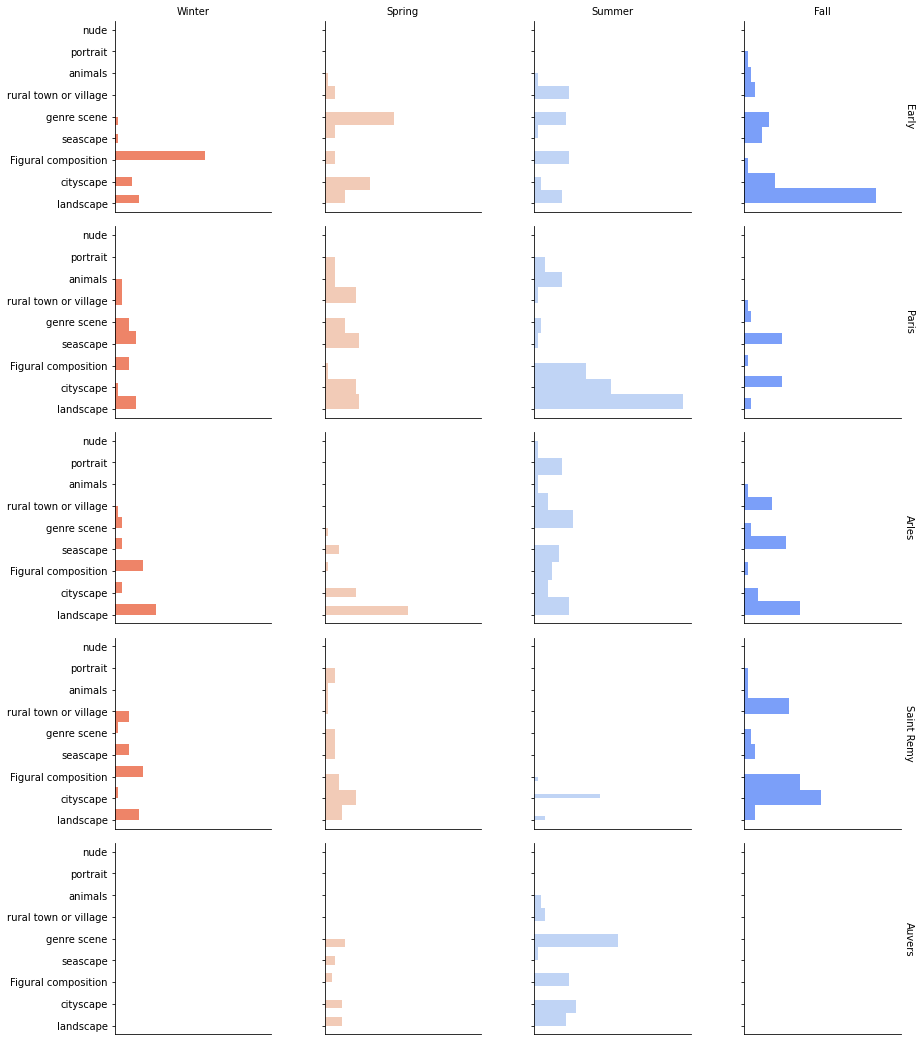

In [73]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, 
                     col='Season',
                     col_order=['Winter', 'Spring', 'Summer', 'Fall'], 
                     row='Label_Place',
                     row_order=['Early', 'Paris', 'Arles', 'Saint Remy', 'Auvers'],
                     hue='Season', 
                     palette="coolwarm",
                     margin_titles=True)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.hist, "Genre", orientation='horizontal')
[plt.setp(ax.texts, text="") for ax in grid.axes.flat] # remove the original texts
                                                    # important to add this before setting titles
grid.set_titles(row_template = '{row_name}', col_template = '{col_name}')
grid.fig.tight_layout(w_pad=1)

for ax in grid.axes.flat:
  ax.set_xticks([])
  ax.set_yticklabels(df.Genre.unique())

grid.set_xlabels('')

# Visualization 2

Create a visualization that highlights some of the "outliers" among van Gogh paintings using the data provided. Optional: Add the names of these outlier works.

In [ ]:
sns.scatterplot(x="brig")